<h1><center><i><b><font color='red'>Digital Factory Banque Misr 2022</font></b></i></center> </h1>

<h1><font color = 'dark blue'> Team 4 : Clustering </font></h1>
<h3><font color = 'darkblue'>1. Abduallah Hussien </h3>

<h3><font color = 'darkblue'>2. Raghda Essam</h3>

<h3><font color = 'darkblue'>3. Mira Ehab</h3>

<h2> Imports </h2>

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from datetime import datetime,date

In [4]:
df = pd.read_csv('bank_transactions.csv')
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df.describe().T

count           mean            std  min  \
CustAccountBalance       1046198.0  115403.540056  846485.380601  0.0   
TransactionTime          1048567.0  157087.529393   51261.854022  0.0   
TransactionAmount (INR)  1048567.0    1574.335003    6574.742978  0.0   

                               25%        50%        75%           max  
CustAccountBalance         4721.76   16792.18   57657.36  1.150355e+08  
TransactionTime          124030.00  164226.00  200010.00  2.359590e+05  
TransactionAmount (INR)     161.00     459.03    1200.00  1.560035e+06

**Discover how many nulls in each column**

In [7]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

**Drop all rows that have nulls**

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**To know the count of each value in column**

In [10]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [11]:
df['CustomerDOB'].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
25/2/59         1
1/4/04          1
24/4/55         1
9/8/50          1
7/3/68          1
Name: CustomerDOB, Length: 17233, dtype: int64

In [12]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)

In [13]:
df['CustomerDOB'].value_counts()

1/1/89     809
1/1/90     784
6/8/91     698
1/1/91     665
1/1/92     631
          ... 
20/7/56      1
1/4/04       1
24/4/55      1
9/8/50       1
7/3/68       1
Name: CustomerDOB, Length: 17232, dtype: int64

**Convert values in "CustomerDOB" column to datetime data type**

In [14]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
df

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053  1994-10-01          F     JAMSHEDPUR   
1                  T2   C2142763  2057-04-04          M        JHAJJAR   
2                  T3   C4417068  1996-11-26          F         MUMBAI   
3                  T4   C5342380  1973-09-14          F         MUMBAI   
4                  T5   C9031234  1988-03-24          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16           143207   
1                   2270.69          2/8/16           141858   
2                  17874.44          2/8/16           142712   
3                 866503.21          2/8/16           142714   
4                   6714.43          2/8/16           181156   
...                     ...             ...              ...   
1048562             7635.19         18/9/16           184824   
1048563            27311.42         18/9/16           183734   
1048564           221757.06         18/9/16           183313   
1048565            10117.87         18/9/16           184706   
1048566            75734.42         18/9/16           181222   

         TransactionAmount (INR)  
0                           25.0  
1                        27999.0  
2                          459.0  
3                         2060.0  
4                         1762.5  
...                          ...  
1048562                    799.0  
1048563                    460.0  
1048564                    770.0  
1048565                   1000.0  
1048566                   1166.0  

[985322 rows x 9 columns]

**Substitute any year more than or equal 2022 by 100**

In [15]:
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years = 100)
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

In [16]:
df['Customer age'] = ((pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'Y')).round(0)
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  Customer age  
0                     25.0          28.0  
1                  27999.0          65.0  
2                    459.0          26.0  
3                   2060.0          49.0  
4                   1762.5          34.0

In [17]:
df['Customer age'].describe().T

count    985322.000000
mean         37.146576
std           8.764578
min           2.000000
25%          31.000000
50%          35.000000
75%          41.000000
max         100.000000
Name: Customer age, dtype: float64

**Convert values in "TransactionDate" column to datetime data type**

In [18]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  Customer age  
0                     25.0          28.0  
1                  27999.0          65.0  
2                    459.0          26.0  
3                   2060.0          49.0  
4                   1762.5          34.0

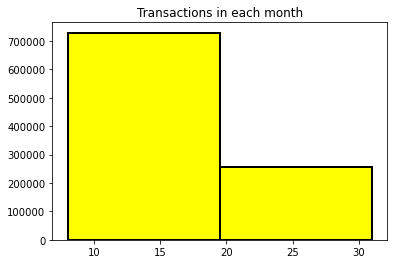

In [19]:
plt.hist(df['TransactionDate'].dt.day, color='yellow', edgecolor='black',bins = 2, linewidth=2)
plt.title('Transactions in each month day')
plt.show()

In [20]:
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  Customer age  TransactionMonth  TransactionDay  
0                     25.0          28.0                 2               0  
1                  27999.0          65.0                 2               0  
2                    459.0          26.0                 2               0  
3                   2060.0          49.0                 2               0  
4                   1762.5          34.0                 2               0

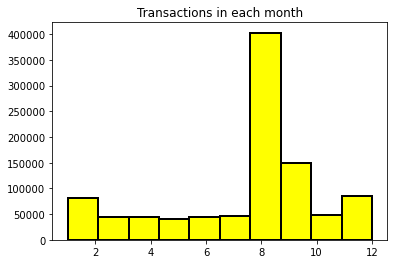

In [21]:
plt.hist(df['TransactionMonth'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each month')
plt.show()

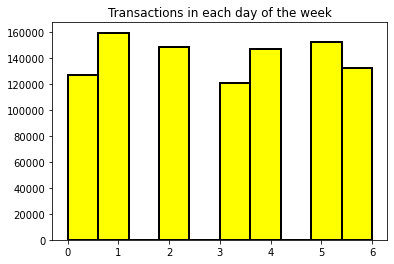

In [22]:
plt.hist(df['TransactionDay'], color='yellow', edgecolor='black',bins = 10, linewidth=2)
plt.title('Transactions in each day of the week')
plt.show()

<AxesSubplot:ylabel='TransactionAmount (INR)'>

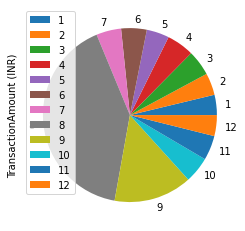

In [23]:
pd.options.plotting.backend = 'matplotlib'

df.groupby(df['TransactionMonth']).sum().plot(kind='pie', y='TransactionAmount (INR)')

<AxesSubplot:ylabel='TransactionAmount (INR)'>

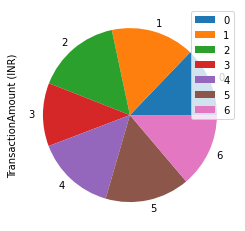

In [24]:
df.groupby(df['TransactionDay']).sum().plot(kind='pie', y='TransactionAmount (INR)')

<AxesSubplot:ylabel='TransactionAmount (INR)'>

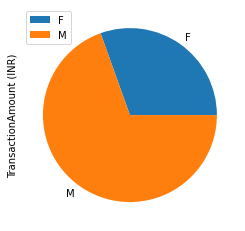

In [25]:
df.groupby(df['CustGender']).sum().plot(kind='pie', y='TransactionAmount (INR)')

**Apply label encoder on "CustGender" and "CustLocation" columns**

In [26]:
le = preprocessing.LabelEncoder()
  
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])
df.head()

TransactionID CustomerID CustomerDOB  CustGender  CustLocation  \
0            T1   C5841053  1994-10-01           0          3117   
1            T2   C2142763  1957-04-04           1          3174   
2            T3   C4417068  1996-11-26           0          4625   
3            T4   C5342380  1973-09-14           0          4625   
4            T5   C9031234  1988-03-24           0          4965   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  Customer age  TransactionMonth  TransactionDay  
0                     25.0          28.0                 2               0  
1                  27999.0          65.0                 2               0  
2                    459.0          26.0                 2               0  
3                   2060.0          49.0                 2               0  
4                   1762.5          34.0                 2               0

**Drop unused columns**

In [27]:
df = df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df

CustGender  CustLocation  CustAccountBalance  \
0                 0          3117            17819.05   
1                 1          3174             2270.69   
2                 0          4625            17874.44   
3                 0          4625           866503.21   
4                 0          4965             6714.43   
...             ...           ...                 ...   
1048562           1          5066             7635.19   
1048563           1          4943            27311.42   
1048564           1          2954           221757.06   
1048565           1          7979            10117.87   
1048566           1          5843            75734.42   

         TransactionAmount (INR)  Customer age  TransactionMonth  \
0                           25.0          28.0                 2   
1                        27999.0          65.0                 2   
2                          459.0          26.0                 2   
3                         2060.0          49.0                 2   
4                         1762.5          34.0                 2   
...                          ...           ...               ...   
1048562                    799.0          32.0                 9   
1048563                    460.0          30.0                 9   
1048564                    770.0          33.0                 9   
1048565                   1000.0          44.0                 9   
1048566                   1166.0          38.0                 9   

         TransactionDay  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1048562               6  
1048563               6  
1048564               6  
1048565               6  
1048566               6  

[985322 rows x 7 columns]

In [28]:
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','Customer age','TransactionMonth','TransactionDay']

In [29]:
df[columns_names].describe().T

count           mean            std  min  \
CustGender               985322.0       0.723067       0.447483  0.0   
CustLocation             985322.0    3596.407063    2084.145964  0.0   
CustAccountBalance       985322.0  106061.188580  817905.353760  0.0   
TransactionAmount (INR)  985322.0    1452.425149    6139.765064  0.0   
Customer age             985322.0      37.146576       8.764578  2.0   
TransactionMonth         985322.0       7.349036       2.633786  1.0   
TransactionDay           985322.0       2.999948       1.981179  0.0   

                               25%      50%       75%           max  
CustGender                  0.0000      1.0      1.00  1.000000e+00  
CustLocation             1805.0000   3531.0   5066.00  8.163000e+03  
CustAccountBalance       4582.1325  16006.3  53759.08  1.150355e+08  
TransactionAmount (INR)   151.0000    431.0   1125.00  1.560035e+06  
Customer age               31.0000     35.0     41.00  1.000000e+02  
TransactionMonth            6.0000      8.0      9.00  1.200000e+01  
TransactionDay              1.0000      3.0      5.00  6.000000e+00

In [30]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 708
CustLocation               708
CustAccountBalance         708
TransactionAmount (INR)    708
Customer age               708
TransactionMonth           708
TransactionDay             708
dtype: int64

In [31]:
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

In [32]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
Customer age               0
TransactionMonth           0
TransactionDay             0
dtype: int64

In [33]:
df['CustLocation'].value_counts()

4625    97605
672     77688
5066    76307
2689    70447
1805    67263
        ...  
2786        1
5257        1
3298        1
2722        1
4667        1
Name: CustLocation, Length: 8161, dtype: int64

**Plotting histograms of the columns to know if data is skewed or not**

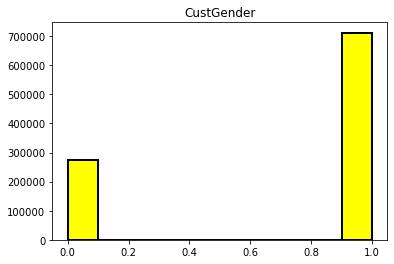

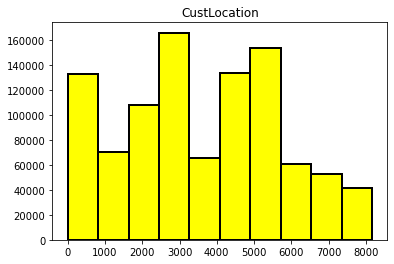

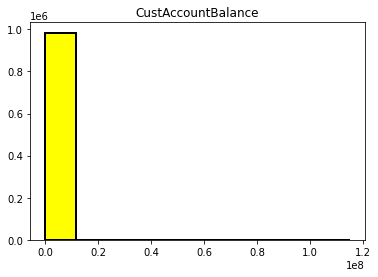

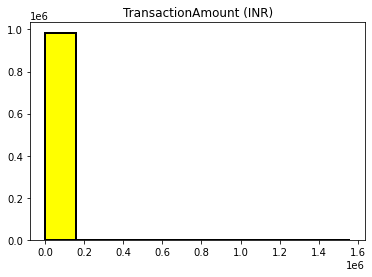

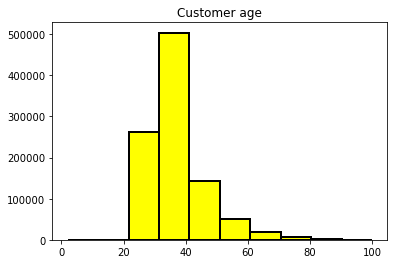

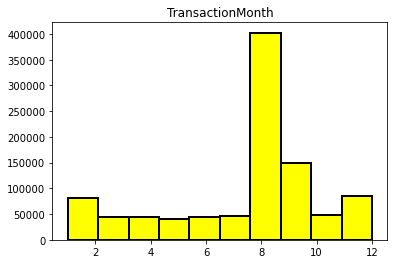

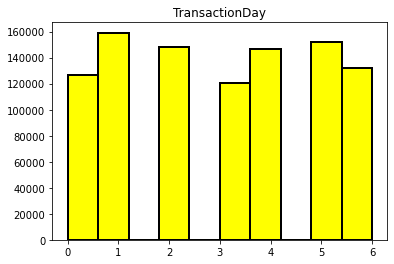

In [34]:
for i in columns_names:
    plt.hist(df[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

**Plotting boxplots of the columns to know if each column has outliers or not**

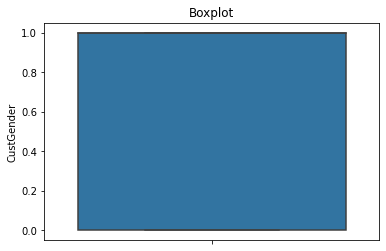

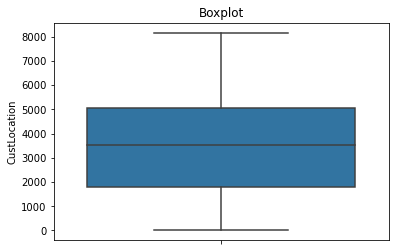

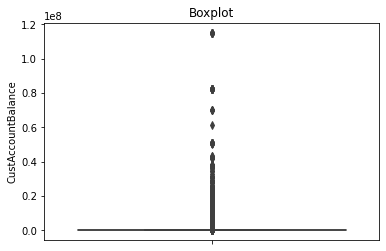

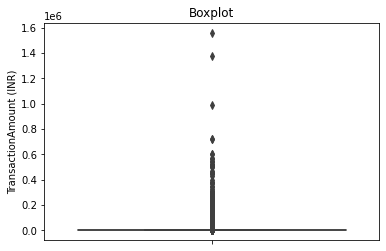

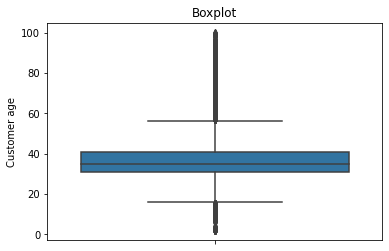

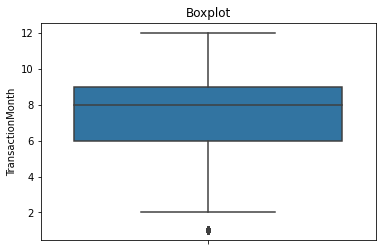

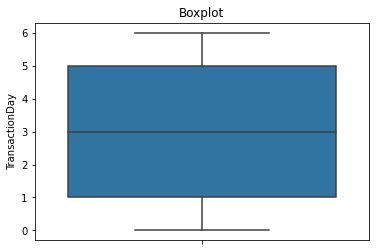

In [35]:
for i in columns_names:
    sns.boxplot(y=df[i])
    plt.title('Boxplot')
    plt.show()

**Apply Normalization method "Standard scaler"**

In [36]:
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df,columns=columns_names)
df.head()

CustGender  CustLocation  CustAccountBalance  TransactionAmount (INR)  \
0   -1.615620     -0.230053           -0.107862                -0.232580   
1    0.618957     -0.202705           -0.126881                 4.322077   
2   -1.615620      0.493473           -0.107794                -0.161917   
3   -1.615620      0.493473            0.930237                 0.098754   
4   -1.615620      0.656602           -0.121445                 0.050316   

   Customer age  TransactionMonth  TransactionDay  
0     -1.043652         -2.031003       -1.514184  
1      3.178023         -2.031003       -1.514184  
2     -1.271851         -2.031003       -1.514184  
3      1.352434         -2.031003       -1.514184  
4     -0.359056         -2.031003       -1.514184

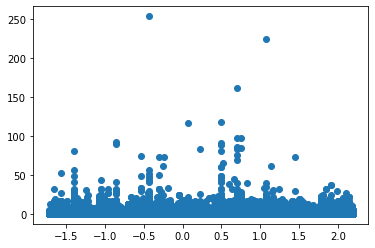

In [37]:
plt.scatter(df.CustLocation, df['TransactionAmount (INR)'])

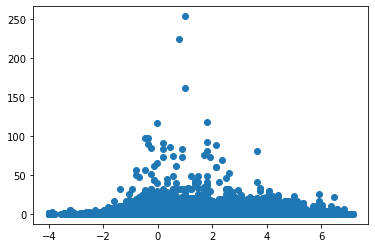

In [38]:
plt.scatter(df['Customer age'], df['TransactionAmount (INR)'])

In [39]:
X = df[['Customer age','TransactionAmount (INR)']].values
Y = df[['CustLocation','TransactionAmount (INR)']].values

<h1> Centroid-based clustering</h1>

<h3>K-Means algorithm</h3>

- Select the number of clusters K
- Initialize the K centroids
- Assign each data point to their closest centroid 
- For each cluster calculate the average of its assigned examples and let it the new position for that centroid
- Reassign each data example to the new closest centroid of each cluster
- Update the centroid position
- The model is ready

In [40]:
import random
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init = 'k-means++', random_state = 42)

visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer2 = KElbowVisualizer(model, k=(2,30), timings=False)

<h3> Centroid-based clustering based on customer's age</h3>

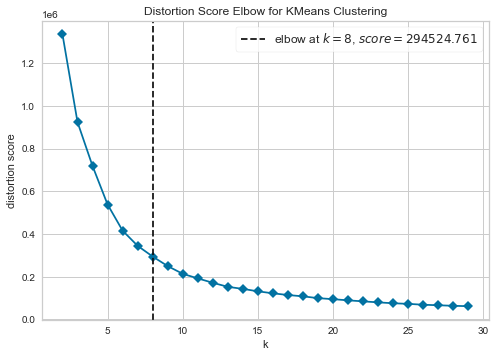

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
visualizer.fit(X)
visualizer.show()

In [42]:
kmeans_x = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
x_kmeans = kmeans_x.fit_predict(X)

<h3> Centroid-based clustering based on customer's location</h3>

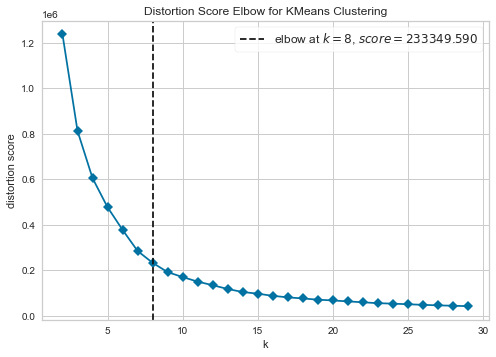

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
visualizer2.fit(Y)
visualizer2.show()

In [44]:
kmeans_y = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_y.fit_predict(Y)

In [45]:
centroids_x = kmeans_x.cluster_centers_
centroids_y = kmeans_y.cluster_centers_

print(centroids_x,centroids_y)

[[-6.71279815e-01 -1.20061061e-01]
 [ 4.91145466e-01  4.13513091e+00]
 [ 1.41230087e+00  2.27465707e-02]
 [ 7.99490709e-01  6.97953240e+01]
 [ 2.22629095e-01 -4.03398631e-02]
 [ 9.34133055e-01  1.56896320e+01]
 [ 3.40367705e+00  1.01577555e-01]
 [ 9.34069401e-01  2.13117796e+02]] [[-1.20365403e+00 -7.88499460e-02]
 [-3.24155991e-01 -7.56887544e-02]
 [-7.96405484e-02  1.55697969e+01]
 [ 1.73500882e+00 -8.26165110e-02]
 [ 7.51650299e-03  4.00860688e+00]
 [ 6.61296156e-01 -6.21962175e-02]
 [ 4.49171948e-01  2.13117796e+02]
 [ 2.69431747e-02  6.97953240e+01]]


In [46]:
df['cluster_age_km'] = x_kmeans
df['cluster_location_km'] = y_kmeans
df.head()

CustGender  CustLocation  CustAccountBalance  TransactionAmount (INR)  \
0   -1.615620     -0.230053           -0.107862                -0.232580   
1    0.618957     -0.202705           -0.126881                 4.322077   
2   -1.615620      0.493473           -0.107794                -0.161917   
3   -1.615620      0.493473            0.930237                 0.098754   
4   -1.615620      0.656602           -0.121445                 0.050316   

   Customer age  TransactionMonth  TransactionDay  cluster_age_km  \
0     -1.043652         -2.031003       -1.514184               0   
1      3.178023         -2.031003       -1.514184               1   
2     -1.271851         -2.031003       -1.514184               0   
3      1.352434         -2.031003       -1.514184               2   
4     -0.359056         -2.031003       -1.514184               0   

   cluster_location_km  
0                    1  
1                    4  
2                    5  
3                    5  
4                    5

In [47]:
# get centroids
cen_xx = [i[0] for i in centroids_x] 
cen_xy = [i[1] for i in centroids_x]

cen_yx = [i[0] for i in centroids_y] 
cen_yy = [i[1] for i in centroids_y]

## add to df
df['cen_xx'] = df.cluster_age_km.map({0:cen_xx[0], 1:cen_xx[1], 2:cen_xx[2],3:cen_xx[3], 4:cen_xx[4], 5:cen_xx[5],6:cen_xx[6], 7:cen_xx[7]})
df['cen_xy'] = df.cluster_age_km.map({0:cen_xy[0], 1:cen_xy[1], 2:cen_xy[2],3:cen_xy[3], 4:cen_xy[4], 5:cen_xy[5],6:cen_xy[6], 7:cen_xy[7]})

df['cen_yx'] = df.cluster_location_km.map({0:cen_yx[0], 1:cen_yx[1], 2:cen_yx[2],3:cen_yx[3], 4:cen_yx[4], 5:cen_yx[5],6:cen_yx[6], 7:cen_yx[7]})
df['cen_yy'] = df.cluster_location_km.map({0:cen_yy[0], 1:cen_yy[1], 2:cen_yy[2],3:cen_yy[3], 4:cen_yy[4], 5:cen_yy[5],6:cen_yy[6], 7:cen_yy[7]})

# define and map colors
colors = ['red', 'yellow', 'grey', 'green','blue','orange','pink','brown']
df['color_age_km'] = df.cluster_age_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})
df['color_location_km'] = df.cluster_location_km.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6],7:colors[7]})

(-0.5, 20.0)

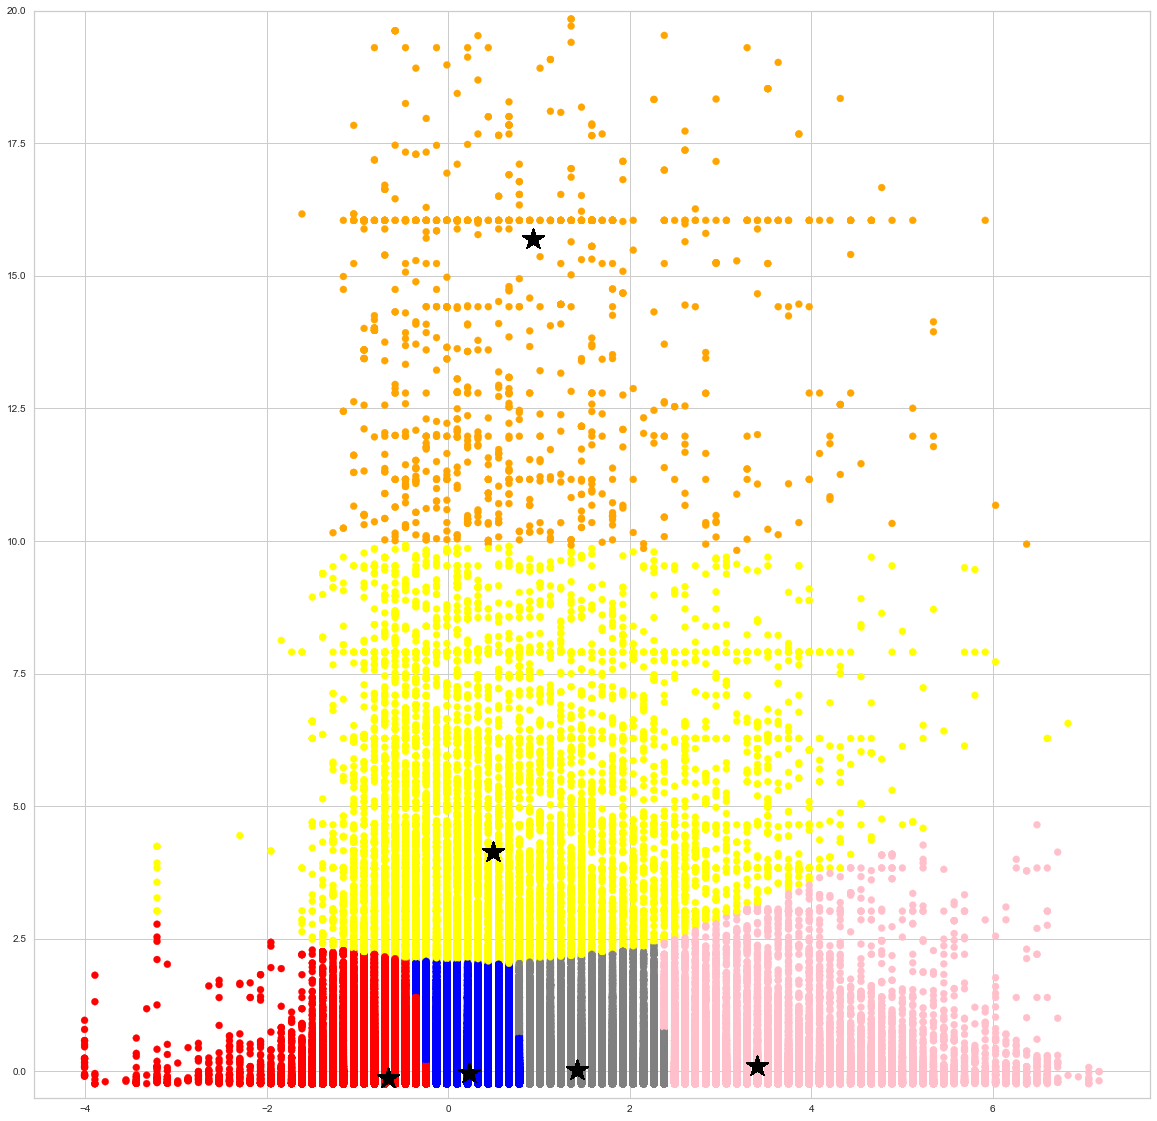

In [48]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='k')
plt.scatter(df['Customer age'], df['TransactionAmount (INR)'], c=df.color_age_km)
plt.scatter(df['cen_xx'], df['cen_xy'],marker = '*',s=500, c='black')
#plt.xlim([0, 100])
plt.ylim([-0.5, 20])

(-0.5, 20.0)

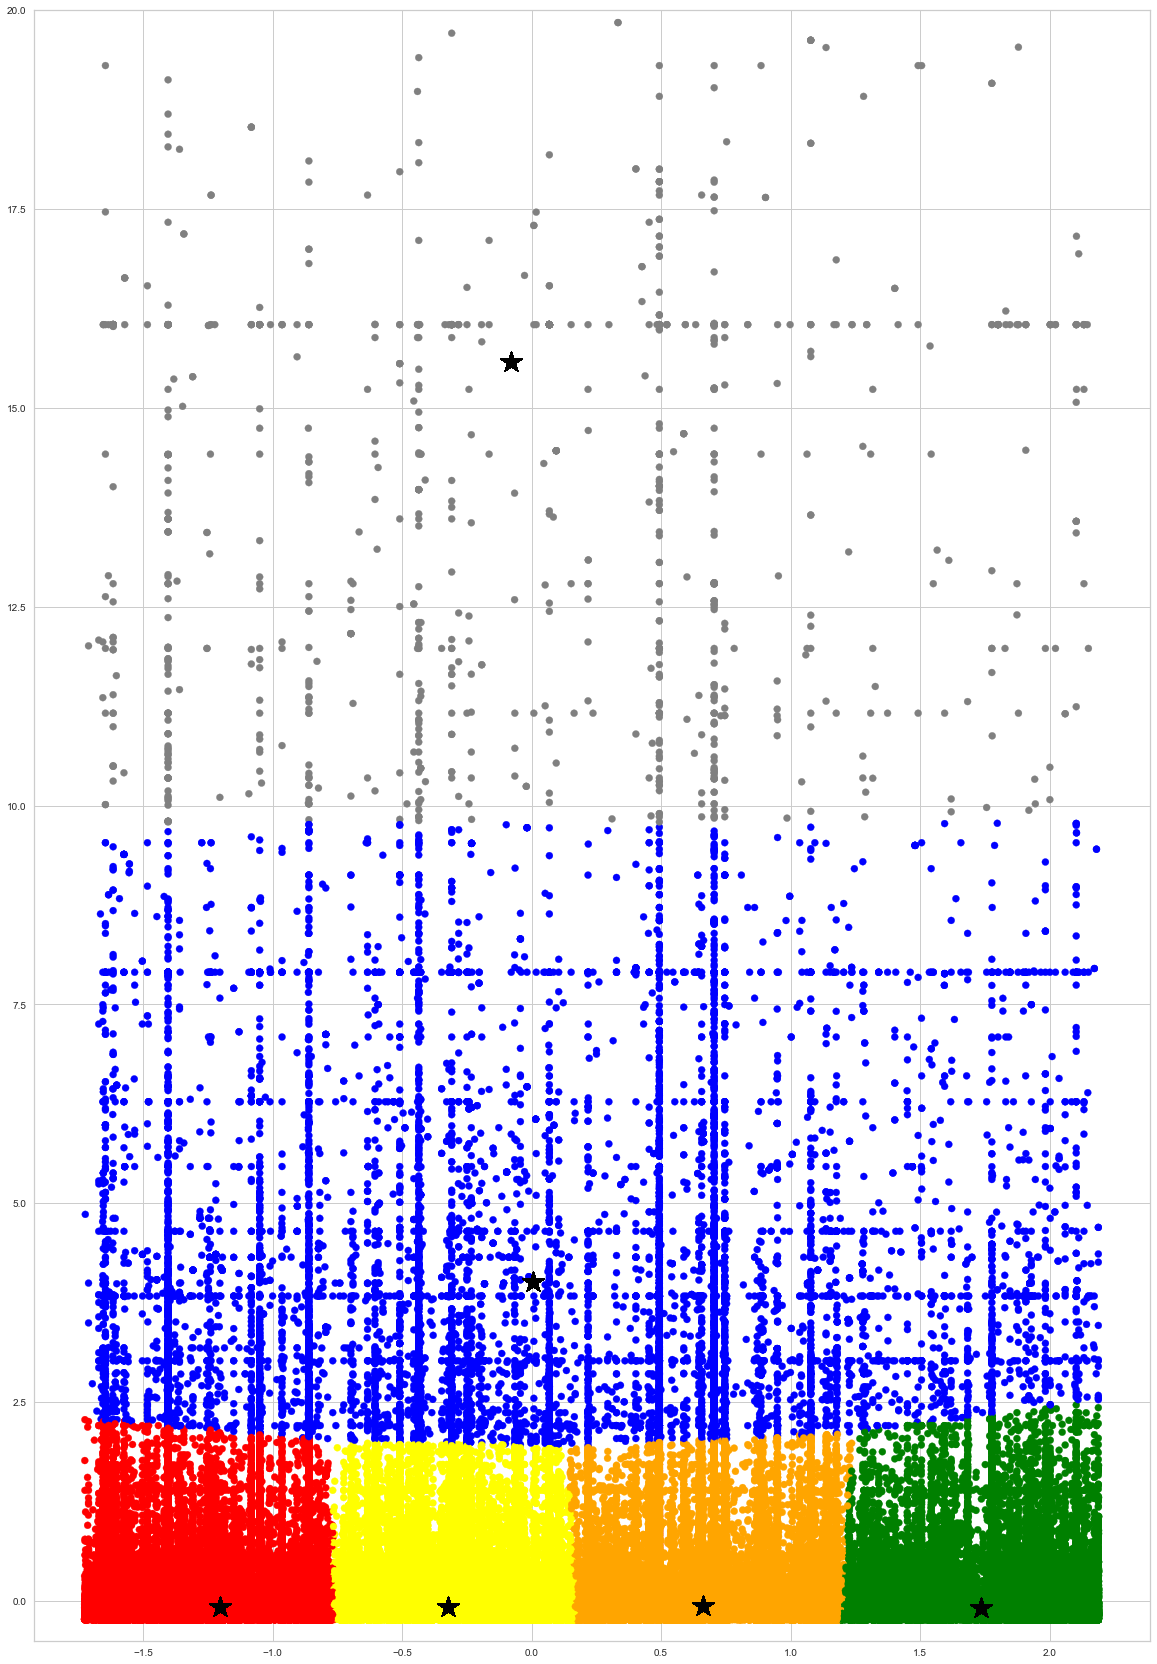

In [49]:
plt.figure(num=None, figsize=(20, 30), facecolor='w', edgecolor='k')
plt.scatter(df['CustLocation'], df['TransactionAmount (INR)'], c=df.color_location_km)
plt.scatter(df['cen_yx'], df['cen_yy'],marker = '*',s=500, c='black')
#plt.xlim([0, 8500])
plt.ylim([-0.5, 20])

<h2>Gaussian Mixture Models At A Glance</h2>

As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

<h3>Distribution-based clustering based on customer's age</h3>

In [60]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

(-2.7, 1.0)

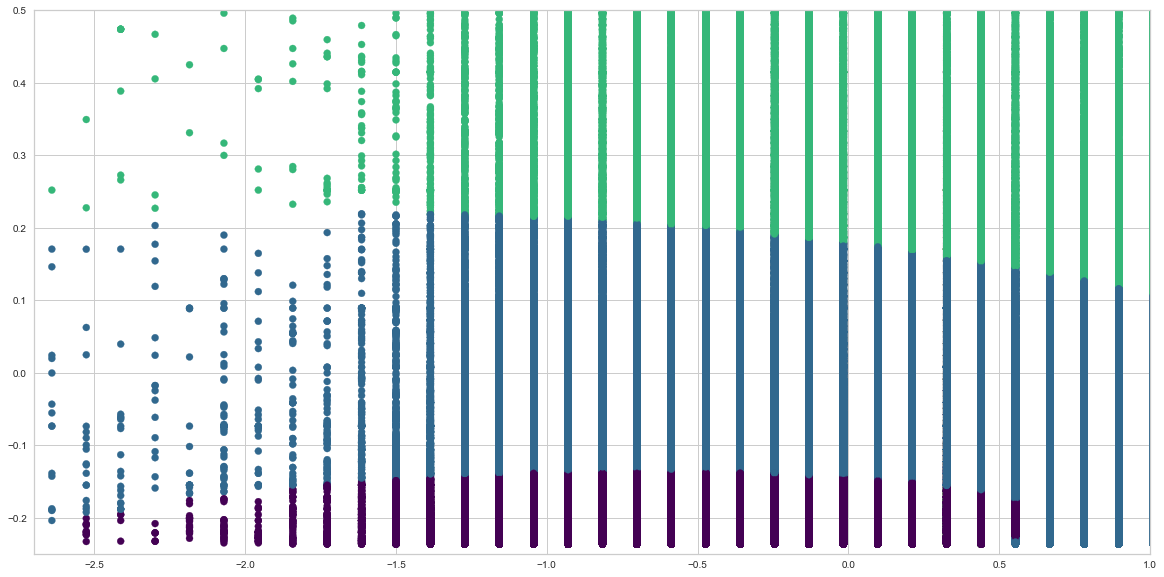

In [61]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(df['Customer age'] ,df["TransactionAmount (INR)"], c=labels, cmap='viridis');
plt.ylim(-0.25, 0.5)
plt.xlim(-2.7,1)

<h3>Distribution-based clustering based on customer's location</h3>

In [62]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=4).fit(Y)
labels = gmm2.predict(Y)

(-0.25, 1.0)

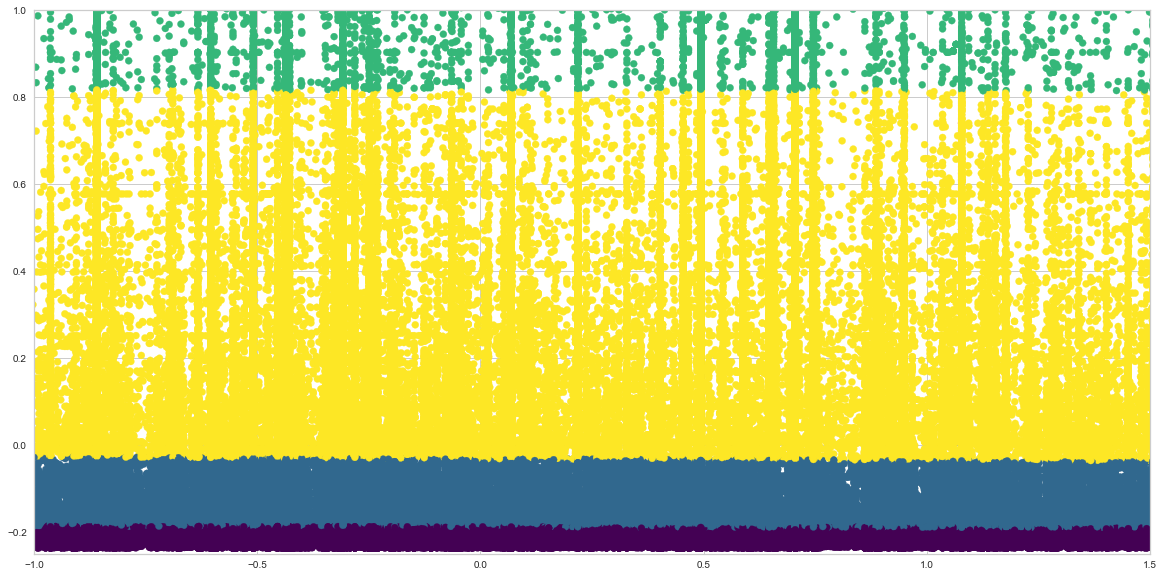

In [63]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(df["CustLocation"], df["TransactionAmount (INR)"], c=labels, cmap='viridis');
plt.xlim(-1,1.5)
plt.ylim(-0.25,1)

<h1>Hierarchical clustering</h1>

Hierarchical clustering is where you build a dendrogram to represent data, where each group links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity. The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.

<h3>Agglomerative</h3>

This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.


<h3>Hierarchical clustering based on customer's age</h3>

In [74]:
X_H = pd.DataFrame(X).sample(20000)

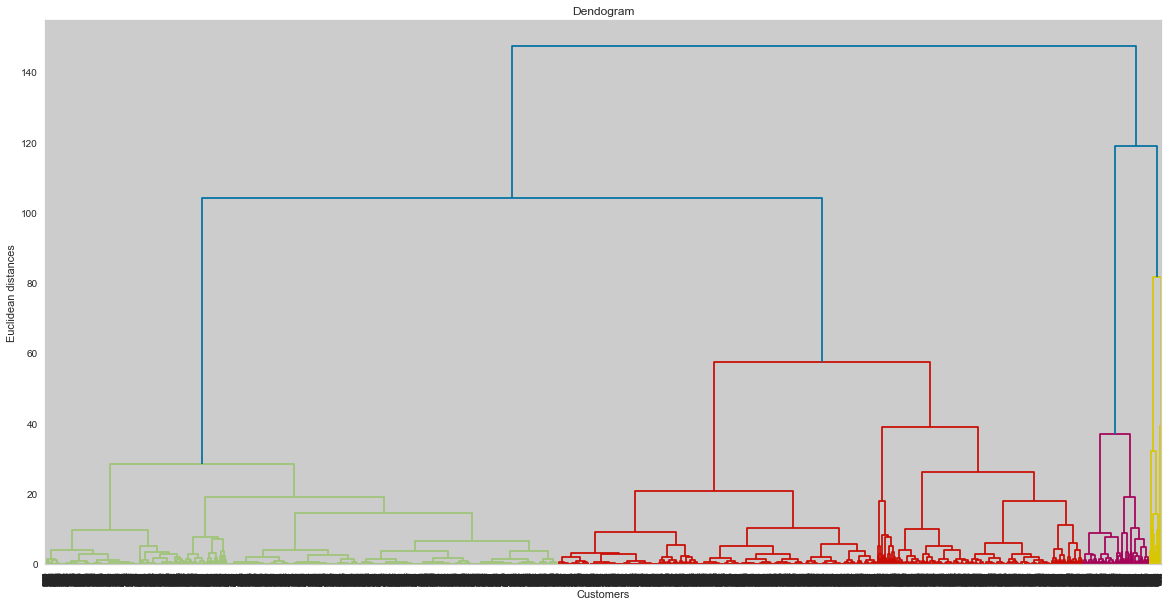

In [75]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))
dendogram_age = sch.dendrogram(sch.linkage(X_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [76]:
unique_colors_age = set(dendogram_age['color_list'])
num_clusters_age = len(unique_colors_age)-1
print("Optimal number of clusters is : ", num_clusters_age)

Optimal number of clusters is :  4


In [77]:
from sklearn.cluster import AgglomerativeClustering
cluster_age = AgglomerativeClustering(n_clusters=num_clusters_age, affinity='euclidean', linkage='ward')
cluster_age.fit_predict(X_H)

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

In [78]:
print("Estimated number of noise points:", list(cluster_age.labels_).count(-1))

Estimated number of noise points: 0


(-0.5, 6.0)

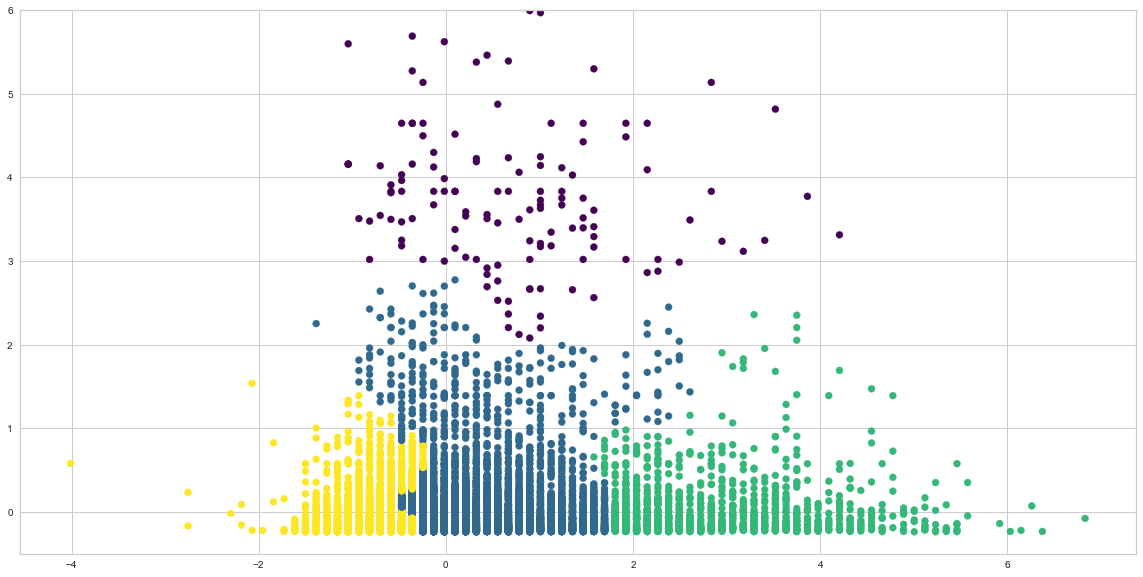

In [96]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(X_H[0], X_H[1], c=cluster_age.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.5,6)

<h3>Hierarchical based on customer's location</h3>

In [81]:
Y_H = pd.DataFrame(Y).sample(20000)

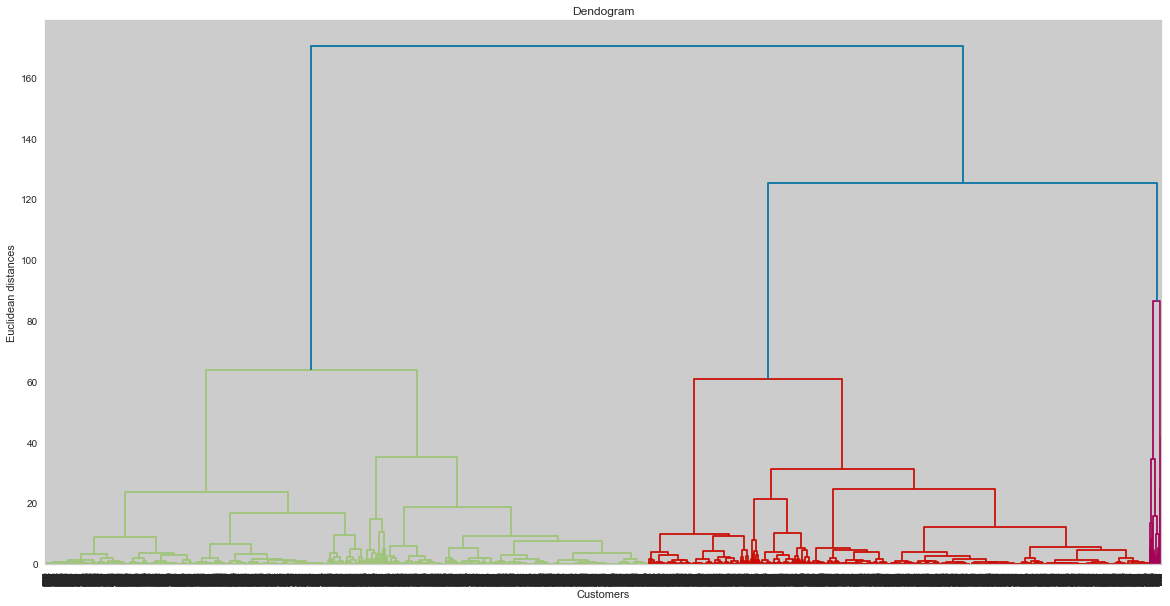

In [82]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))

dendogram_loc = sch.dendrogram(sch.linkage(Y_H, method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [83]:
unique_colors_loc = set(dendogram_loc['color_list'])
num_clusters_loc = len(unique_colors_loc)-1
print("Optimal number of clusters is : ", num_clusters_loc)

Optimal number of clusters is :  3


In [88]:
from sklearn.cluster import AgglomerativeClustering
cluster_loc = AgglomerativeClustering(n_clusters=num_clusters_loc, affinity='euclidean', linkage='ward')
cluster_loc.fit_predict(Y_H)

array([1, 2, 2, ..., 1, 2, 1], dtype=int64)

In [85]:
print("Estimated number of noise points:", list(cluster_loc.labels_).count(-1))

Estimated number of noise points: 0


(-0.25, 10.0)

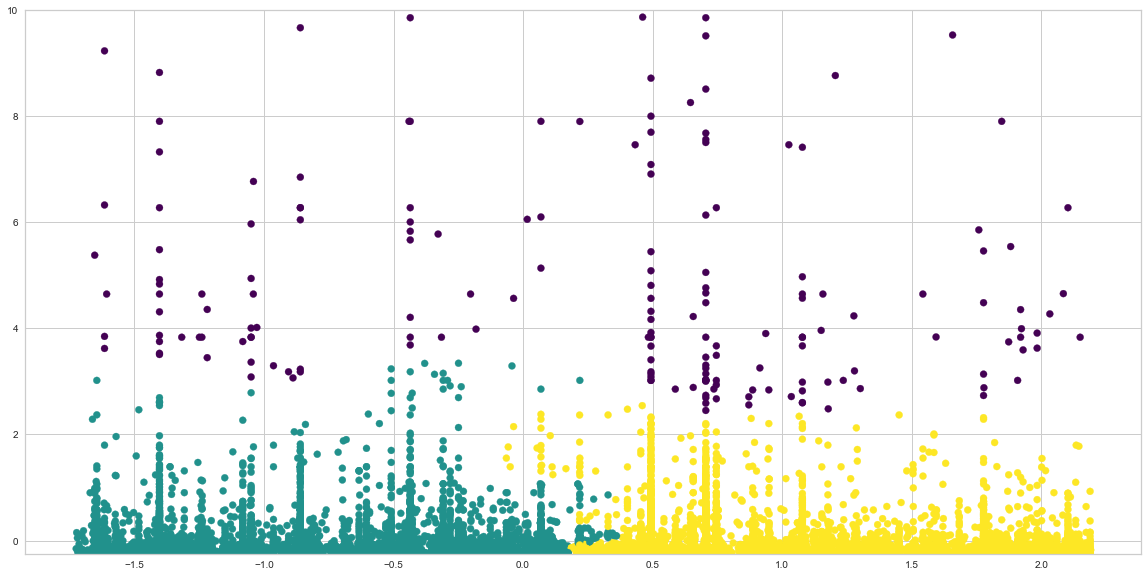

In [94]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.scatter(Y_H[0], Y_H[1], c=cluster_loc.labels_, cmap='viridis');
#plt.xlim(-1,1.5)
plt.ylim(-0.25,10)

<h1> Density-based clustering</h1>

<h2>Key Characteristics of  DBSCAN Algorithm</h2>

- It does not require the number of clusters as input.
- It is can detect outliers while finding clusters.
- DBSCAN algorithm can detect clusters that are complex or randomly shaped and sized.

<h3>Finding the Optimal value of Epsilon</h3>

The average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. We then plot the average k-distances in ascending order on a k-distance graph

The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.

<h3>Density-based clustering based on customer's age</h3>

Text(0, 0.5, 'Distance')

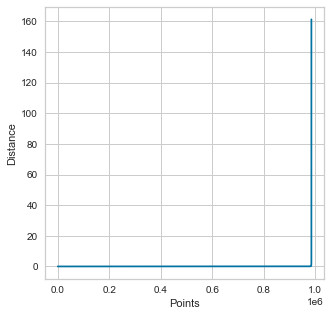

In [50]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=8)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,7], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.0006496418796136383


<Figure size 360x360 with 0 Axes>

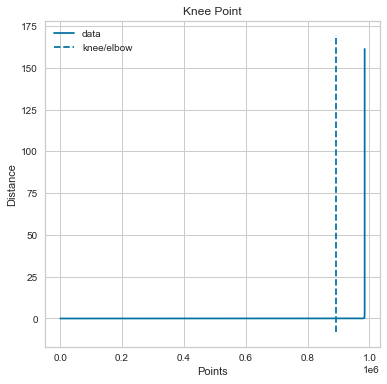

In [51]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [52]:
dbscan_cluster_x = DBSCAN(eps=0.0006, min_samples=8)
dbscan_cluster_x.fit(X)

DBSCAN(eps=0.0006, min_samples=8)

In [53]:
labels_age=dbscan_cluster_x.labels_
    
df['cluster_age_db'] = labels_age
df.loc[df.cluster_age_db == -1, 'cluster_age_db'] = 10000
df.cluster_age_db.nunique()

3984

(-0.25, 0.5)

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


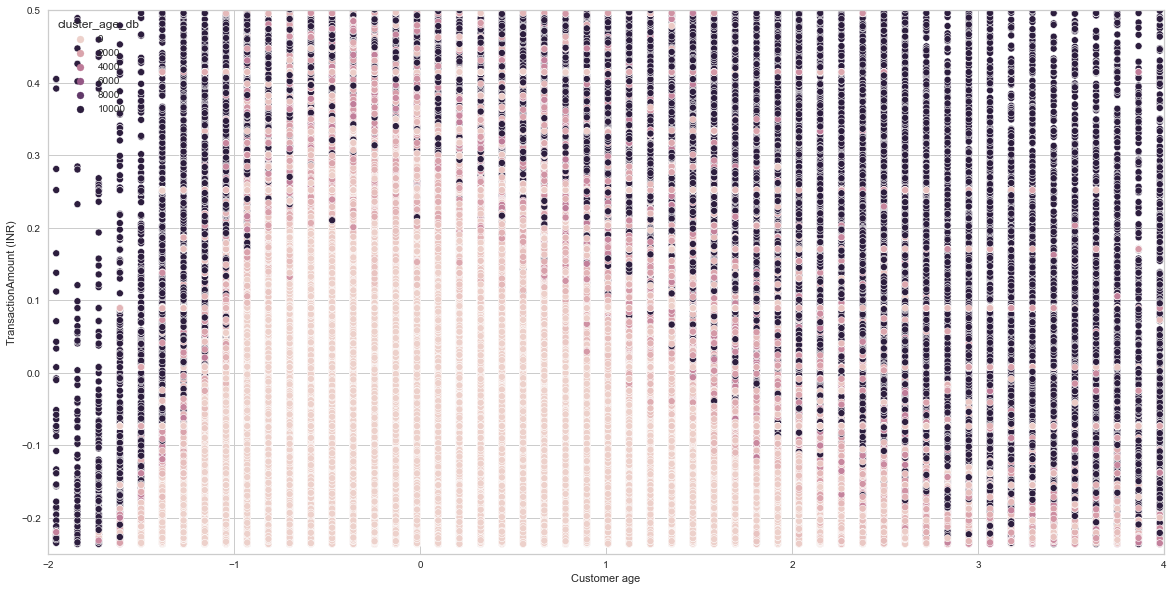

In [54]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
sns.scatterplot(x=df['Customer age'], y= df['TransactionAmount (INR)'], hue=df["cluster_age_db"])
plt.xlim([-2,4])
plt.ylim([-0.25,0.5])

<h3>Density-based clustering based on customer's location</h3>

Text(0, 0.5, 'Distance')

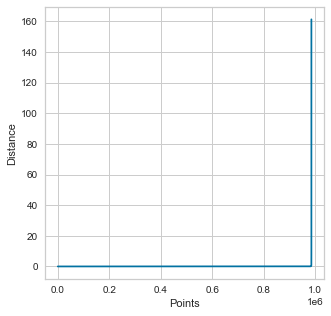

In [55]:
nearest_neighbors = NearestNeighbors(n_neighbors=8)
neighbors = nearest_neighbors.fit(Y)

distances, indices = neighbors.kneighbors(Y)
distances = np.sort(distances[:,7], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.0036139754464129957


<Figure size 360x360 with 0 Axes>

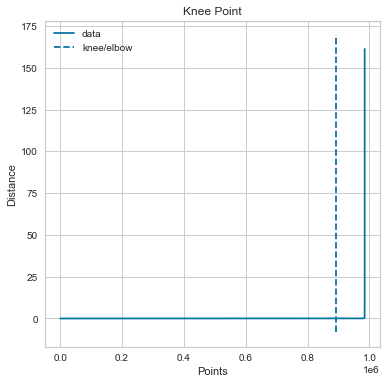

In [56]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [57]:
dbscan_cluster_y = DBSCAN(eps=0.0036, min_samples=8)
dbscan_cluster_y.fit(Y)

DBSCAN(eps=0.0036, min_samples=8)

In [100]:
labels_location=dbscan_cluster_y.labels_
    
df['cluster_location_db'] = labels_location
df.loc[df.cluster_location_db == -1, 'cluster_location_db'] = 10000
df.cluster_location_db.value_counts()

1        95811
14       88500
3        77405
10000    76556
7        75656
         ...  
2418         3
2168         2
2415         2
2419         2
2629         1
Name: cluster_location_db, Length: 2641, dtype: int64

(-0.25, 1.0)

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


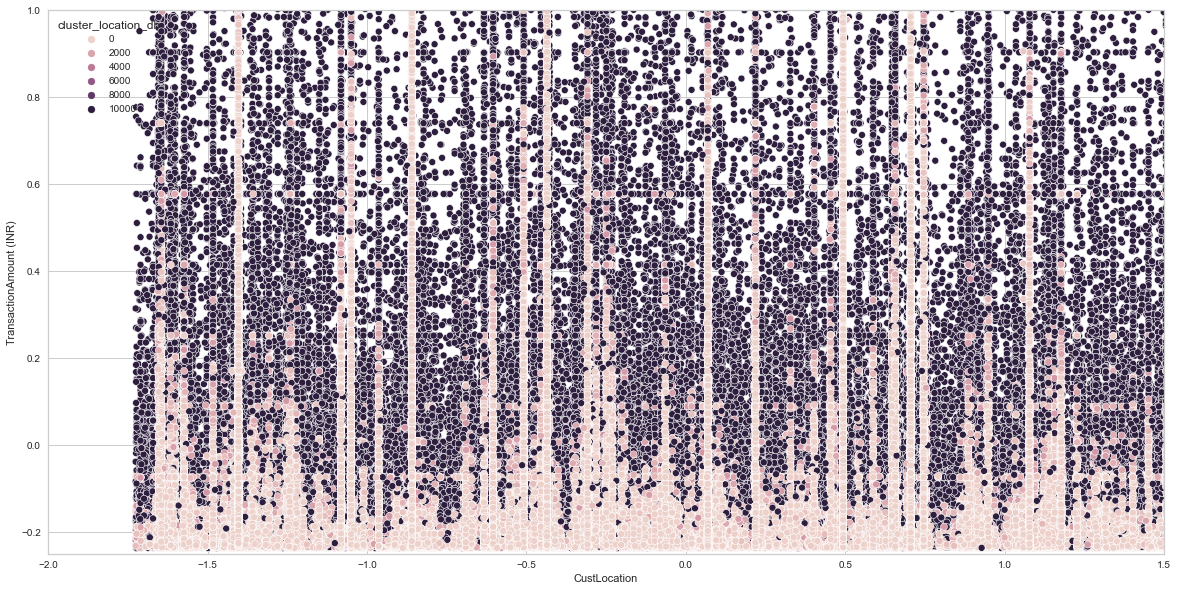

In [101]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
sns.scatterplot(x=df['CustLocation'], y= df['TransactionAmount (INR)'], hue=df["cluster_location_db"])
plt.xlim([-2,1.5])
plt.ylim([-0.25,1])

<h1><center><i><b><font color='red'>Thank You</font></b></i></center> </h1>